# Prerequisite: Data set

This tutorial will guide you through two methods for obtaining and preparing the **congress_network** folder from the `.zip` file in Google Colab:

1. **Automated Download and Extraction**  
2. **Manual Upload**

---


## Automated Download and Extraction

In this approach, we will:

1. Mount Google Drive.  
2. Create or navigate to a `Data` subfolder under **Colab Notebooks**.  
3. Use `curl` to download the `.zip` file from the repository.  
4. Extract (unzip) the `.zip` file.  
5. Verify the extracted files.  
6. Load & verify the dataset.  

**Download link**  
[https://snap.stanford.edu/data/congress_network.zip](https://snap.stanford.edu/data/congress_network.zip)

The compressed archive is `congress_network.zip`, which contains a folder `congress_network` with these files:

- `compute_vc.py`
- `congress_network_data.json`
- `congress.edgelist`
- `histogram_weights.py`
- `README.txt`
- `viral_centrality.py`


In [1]:
try:
    import google.colab
    from google.colab import drive
except ImportError:
    IN_COLAB = False
else:
    IN_COLAB = True

In [2]:
# 1) Mount Google Drive (Colab only)
import os

if IN_COLAB:
    drive.mount("/content/drive")
    data_folder = "/content/drive/MyDrive/Colab Notebooks/Data"
else:
    print("Not running in Google Colab. Using local ./drive folder.")
    data_folder = os.path.abspath(os.path.join(".", "data"))

# 2) Create or navigate to the 'Data' subfolder
os.makedirs(data_folder, exist_ok=True)
print(f"Using data folder: {data_folder}")


url = "https://snap.stanford.edu/data/congress_network.zip"
zip_file_path = os.path.join(data_folder, "congress_network.zip")

if not os.path.exists(zip_file_path):
    import urllib.request

    print("Downloading ZIP file...")
    urllib.request.urlretrieve(url, zip_file_path)
    print("Download complete.")
else:
    print("ZIP file already exists.")


import zipfile

extract_dir = os.path.join(data_folder, "congress_network")
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(data_folder)
    print(f"Extracted to {extract_dir}")

# 5) Verify the extracted files
print("Extracted files:")
for f in os.listdir(extract_dir):
    print(f"- {f}")

# 6) Load & verify the dataset
import pandas as pd

edgelist_path = os.path.join(extract_dir, "congress.edgelist")
data = []
for line in open(edgelist_path):
    s, t, weight = line.strip().split(maxsplit=2)
    weight = float(weight.split()[-1].replace("}", ""))
    data.append((int(s), int(t), weight))
df_edges = pd.DataFrame(data, columns=["source", "target", "weight"])
df_edges.head()

Not running in Google Colab. Using local ./drive folder.
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extracted to /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/congress_network
Extracted files:
- congress.edgelist
- viral_centrality.py
- compute_vc.py
- README.txt
- congress_network_data.json
- histogram_weights.py


,source,target,weight
0,0,4,0.002105
1,0,12,0.002105
2,0,18,0.002105
3,0,25,0.004211
4,0,30,0.002105


You should see the following output:
```
Sample of edgelist:
  source target, weight
0     1      2, 0.002
1     1      3, 0.002
2     2      3, 0.002
```

## Manual Upload Instructions

If the automated method is not feasible, or you prefer manual steps:

1. **Download** the `.zip` file from the repository to your local machine:  
   [congress_network.zip](https://snap.stanford.edu/data/congress_network.zip)
2. **Extract** it locally (e.g., right-click and unzip, or use `unzip`/`gunzip` in macOS/Linux). You should have a folder named `congress_network` with all the files inside.
3. **Create or navigate** to a `Data` subfolder under **Colab Notebooks**:
   - Go to **Google Drive** on your browser.  
   - Under **My Drive**, find **Colab Notebooks**.  
   - Right-click and select **New folder**, name it `Data` (if it doesn't already exist).
4. **Upload** the **entire** extracted `congress_network` folder into that `Data` folder.
5. **Open or create** a Colab notebook.
6. **Mount** Google Drive and **change directory** to the `Colab Notebooks` folder.
7. **Load & verify** the dataset in your notebook.


# 1. Definition of Graphs: Nodes and Edges

In this section, we will learn:
- What **nodes** (or **vertices**) are  
- What **edges** (or **links**) are  
- How graphs are commonly represented in data structures


## 1.1 Key Components

A **graph** is a set of **nodes** (often called vertices) that may be connected by **edges**.
- **Nodes (vertices)** represent entities or objects.  
- **Edges** represent the relationships or connections between nodes.

For example, in a social network:
- Each person is a **node**  
- A “friendship” or “following” relationship is an **edge**  

In a road network:
- Each location (intersection or city) is a **node**  
- Each road is an **edge**  

- Directed Edges: Indicate a one-way relationship, e.g., a follower on Twitter.

- Undirected Edges: Indicate a mutual relationship, e.g., a friendship on
Facebook.

- Weighted Edges: Include a numerical value to represent strength, cost, or
distance.

Example:

- A flight route between two airports can be represented as a weighted,
directed edge where the weight is the distance or cost of travel.

## 1.2 Common Representations

There are several ways to represent a graph in code:

1. **Adjacency List**: Each node has a list of adjacent nodes (neighbors).  
2. **Adjacency Matrix**: A 2D matrix where each cell indicates whether an edge exists (and possibly its weight).  
3. **Edge List**: A simple list of edges, where each edge is represented by the nodes it connects.

In Python, an adjacency list can be stored as a dictionary,
where keys are nodes and values are lists of adjacent nodes.


### Represent a Simple Graph with an Adjacency List

Below is a **Practice Activity** where you will review how to store a simple **undirected** graph in Python using a **dictionary-based adjacency list**.

---


In [3]:
"""
Instructions for Learners:
1. Study this example of a small undirected graph with four nodes (A, B, C, D).
2. Notice how each node appears as a key in the dictionary, mapping to a list of its neighbors.
3. (Optional) Try adding another node (e.g., E) and edges to extend the graph.
   Then print the updated adjacency list to confirm your changes.
"""

# Suppose the edges are: A-B, A-C, B-D (all undirected).
# This means:
# - 'A' connects to 'B' and 'C'
# - 'B' connects to 'A' and 'D'
# - 'C' connects to 'A'
# - 'D' connects to 'B'

my_graph = {"A": ["B", "C"], "B": ["A", "D"], "C": ["A"], "D": ["B"]}

# Print the graph to confirm its structure
print("Adjacency List Representation:")
print(my_graph)

Adjacency List Representation:
{'A': ['B', 'C'], 'B': ['A', 'D'], 'C': ['A'], 'D': ['B']}


### Observations

- **Undirected Graph**: An edge A-B means both "A in B's adjacency list" and "B in A's adjacency list."
- **Keys**: The dictionary keys (`'A'`, `'B'`, `'C'`, `'D'`) are the **nodes**.
- **Values**: Each key’s value is a **list of neighbors** for that node.
- **Expanding the Graph**: By adding new nodes or edges, you can explore how adjacency lists evolve.

---

### Next Steps (Optional)

1. **Extend the Graph**: Add a new node `"E"` and edges (e.g., `E-A`, `E-D`). Print the dictionary to see your updates.
2. **Directed Variation**: Make it a directed graph by having each edge only appear once (e.g., `A` connects to `B` but not necessarily vice versa).
3. **Integrate Other Operations**: Consider writing small functions for adding/removing nodes or edges.

This activity is meant to **familiarize learners with adjacency lists** so they can later implement graph algorithms (like BFS, DFS, or shortest path) with ease.


## Mini-Quiz 1

1. **Nodes vs. Edges**  
   a. In the dictionary above, how many nodes are there?  
   b. How many edges are there (considering it’s an undirected graph)?  

2. **Graph Terminology**  
   a. Another term for a “node” is ______.  
   b. Another term for an “edge” is ______.  

Try to answer these questions before looking at the answers below.


# Practice Activity:
A Python script to create and display a graph using adjacency lists, matrices, and edge lists. Using NetworkX for visualization.

Graph with 3 nodes and 3 edges


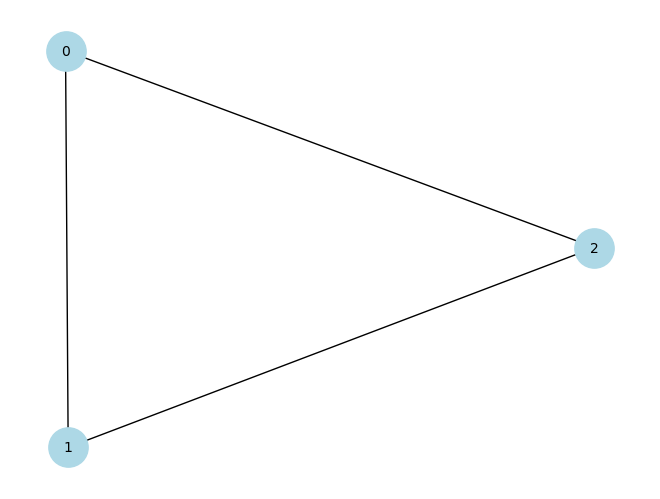

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph using adjacency list
G = nx.Graph()  # Undirected graph
# For a directed graph, use nx.DiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])
print(G)
# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()

# Quiz 2:

1. What is the primary difference between a directed and undirected edge?

2. Which representation is most memory-efficient for sparse graphs?

a) Adjacency Matrix

b) Adjacency List

c) Edge List



# 2. Types of Graphs

In this section, we will explore:
- Directed vs. Undirected Graphs  
- Weighted vs. Unweighted Graphs  
- Bipartite Graphs  
- Multigraphs

We’ll use [NetworkX](https://networkx.org/) to create and visualize each graph type.


## 2.1 Directed vs. Undirected Graphs

- **Undirected Graph**: An edge between \(u\) and \(v\) implies a bidirectional relationship (e.g., friendships).  
- **Directed Graph**: An edge from \(u\) to \(v\) has a direction (e.g., following on Twitter).

Let’s create a small **undirected graph** and a small **directed graph** in NetworkX, then visualize both.


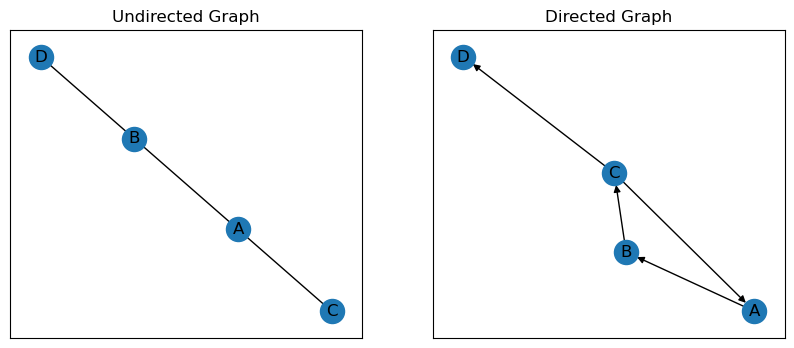

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G_undirected = nx.Graph()
G_undirected.add_nodes_from(["A", "B", "C", "D"])
G_undirected.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("D", "B")])

# Create a directed graph
G_directed = nx.DiGraph()
G_directed.add_nodes_from(["A", "B", "C", "D"])
G_directed.add_edges_from(
    [
        ("A", "B"),
        ("B", "C"),
        ("C", "A"),
        ("C", "D"),
        # ("D", "C")
    ]
)

# Visualize both graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Undirected graph
pos_undir = nx.spring_layout(G_undirected, seed=42)
nx.draw_networkx(G_undirected, pos=pos_undir, ax=axes[0])
axes[0].set_title("Undirected Graph")

# Directed graph
pos_dir = nx.spring_layout(G_directed, seed=42)
nx.draw_networkx(G_directed, pos=pos_dir, ax=axes[1], arrows=True)
axes[1].set_title("Directed Graph")

plt.show()

### Observations
- In the undirected graph on the left, edges have no inherent direction.  
- In the directed graph on the right, edges include arrows indicating their direction.


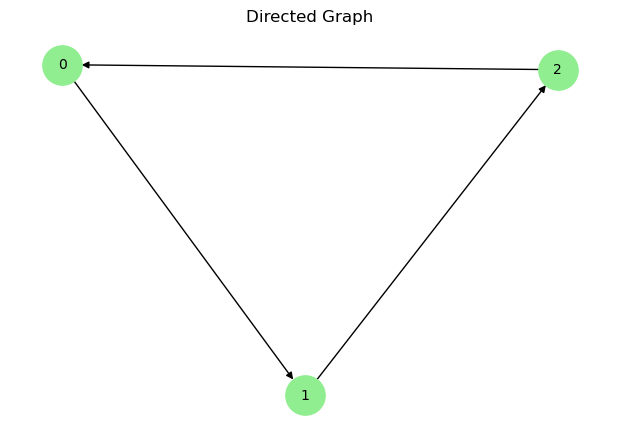

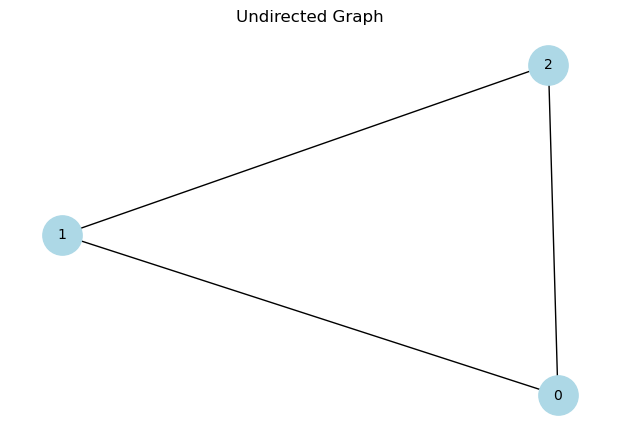

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Directed Graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([(0, 1), (1, 2), (2, 0)])

# Draw directed graph
plt.figure(figsize=(6, 4))
nx.draw(
    G_directed,
    with_labels=True,
    node_color="lightgreen",
    node_size=800,
    font_size=10,
    arrows=True,
)
plt.title("Directed Graph")
plt.show()

# Undirected Graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([(0, 1), (1, 2), (2, 0)])

# Draw undirected graph
plt.figure(figsize=(6, 4))
nx.draw(
    G_undirected, with_labels=True, node_color="lightblue", node_size=800, font_size=10
)
plt.title("Undirected Graph")
plt.show()

## 2.2 Weighted vs. Unweighted Graphs

- **Unweighted Graph**: Edges may be present or absent, but have no specific “cost” or “weight.”  
- **Weighted Graph**: Each edge has an associated weight or cost (e.g., distances, capacities).

Below, we’ll create a **weighted graph** and visualize the edge weights.


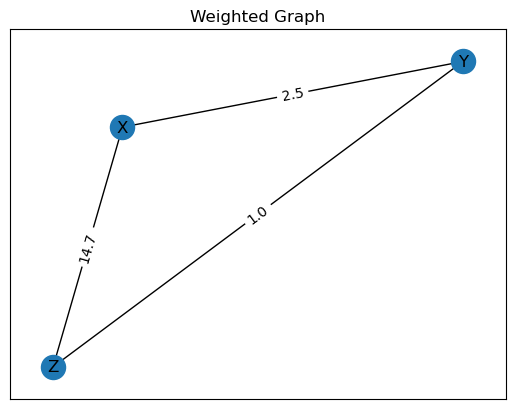

In [7]:
G_weighted = nx.Graph()
G_weighted.add_nodes_from(["X", "Y", "Z"])
# Add weighted edges
G_weighted.add_edge(
    "X", "Y", weight=2.5
)  # experiment with different layouts and negative weights
G_weighted.add_edge("Y", "Z", weight=1.0)
G_weighted.add_edge("X", "Z", weight=14.7)

# Draw the weighted graph
pos = nx.spring_layout(G_weighted, weight="weight", seed=42)
# pos = nx.circular_layout(G_weighted)
nx.draw_networkx(G_weighted, pos, with_labels=True)

# Extract edge weights
edge_labels = nx.get_edge_attributes(G_weighted, "weight")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels)

plt.title("Weighted Graph")
plt.show()

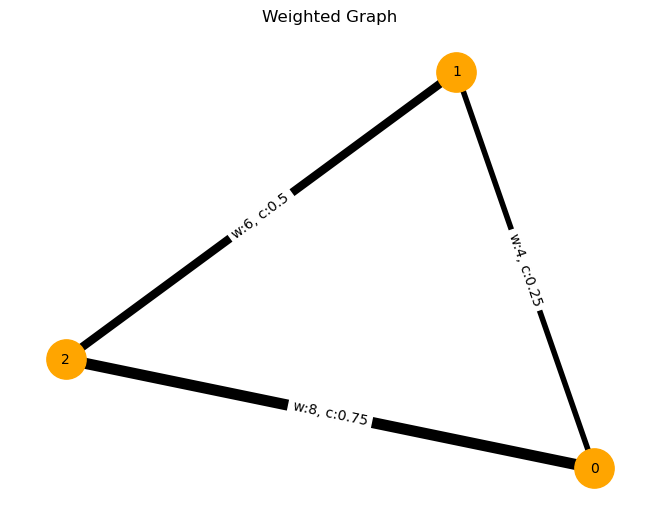

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Weighted Graph
G_weighted = nx.Graph()
G_weighted.add_edge(0, 1, weight=4, cost=0.25)
G_weighted.add_edge(1, 2, weight=6, cost=0.5)
G_weighted.add_edge(2, 0, weight=8, cost=0.75)

pos = nx.spring_layout(
    G_weighted,
    weight="inv_weight",
)
weights = nx.get_edge_attributes(G_weighted, "weight")
nx.draw(
    G_weighted,
    pos,
    with_labels=True,  # show labels
    node_color="orange",
    node_size=800,
    font_size=10,
    width=list(weights.values()),  # Set edge width proportional to weight
)
costs = nx.get_edge_attributes(G_weighted, "cost")
labels = {e: f"w:{weights[e]}, c:{costs[e]}" for e in G_weighted.edges()}
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)
plt.title("Weighted Graph")
plt.show()

### Observations
- The edge labels show the “weight” of each connection.  
- In an **unweighted** version of the same graph, these edges would simply be present or absent without any numerical value.


## 2.3 Bipartite Graphs

A **bipartite graph** can be divided into two sets of nodes, \(U\) and \(V\), such that **no edges exist between nodes within the same set**.

Common example: Modeling “users” and “items” (e.g., movies). An edge connects a user to the movies they’ve watched or rated, but users do not directly connect to other users in a pure bipartite representation.



To visually differentiate nodes in the two partitions (U and V), we’ll:
1. **Assign different colors** to the sets, and
2. **Use different node shapes** if desired (e.g., circles vs. squares).

---


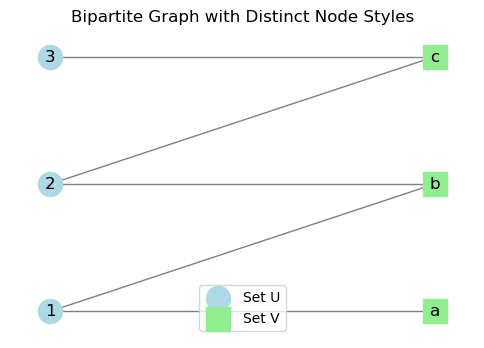

Is the graph bipartite? True


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create a bipartite graph
B = nx.Graph()

# Partition sets: U = {1,2,3} and V = {'a','b','c'}
U = [1, 2, 3]
V = ["a", "b", "c"]

B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)


# Add edges only between sets U and V
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c")])


# We'll use a bipartite layout
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(U))  # Put U nodes on x=0
pos.update((node, (1, i)) for i, node in enumerate(V))  # Put V nodes on x=1
# pos.update((node, (2, i)) for i, node in enumerate(W))

# Separate the nodes for customized drawing
# - U_nodes get one style (e.g., circle, one color)
# - V_nodes get another style (e.g., square, another color)
plt.figure(figsize=(6, 4))

nx.draw_networkx_nodes(
    B,
    pos=pos,
    nodelist=U,
    node_color="lightblue",
    node_shape="o",  # circle
    label="Set U",
)
nx.draw_networkx_nodes(
    B,
    pos=pos,
    nodelist=V,
    node_color="lightgreen",
    node_shape="s",  # square
    label="Set V",
)
nx.draw_networkx_edges(B, pos=pos, edge_color="gray")
nx.draw_networkx_labels(B, pos=pos)

plt.title("Bipartite Graph with Distinct Node Styles")
plt.legend(scatterpoints=1)  # Show labels from node drawing
plt.axis("off")
plt.show()

# Check if bipartite (should be True)
print("Is the graph bipartite?", bipartite.is_bipartite(B))

In [10]:
nx.is_bipartite(B)

True

If we add an edge between two nodes in the same set, the graph is no longer bipartite.

In [11]:
B_not = B.copy()
B_not.add_edge(1, 2)
nx.is_bipartite(B_not)

False

### Observations
- **Node Shapes**: Circles for set U, squares for set V.
- **Node Colors**: Light blue vs. light green for easy visual distinction.
- **Edges**: Still only between nodes in U and V, reflecting the bipartite structure.
- **Layout**: The bipartite layout places U on `x=0` and V on `x=1`, making the partitioning clear.

This approach makes it easier to see which nodes belong to which partition in the bipartite graph.


## 2.4 Multigraphs

A **multigraph** allows multiple edges between the same nodes.
For instance, if you have parallel highways or multiple distinct relationships between two people, you can model them using a multigraph.

NetworkX supports **MultiGraph** (undirected) and **MultiDiGraph** (directed).


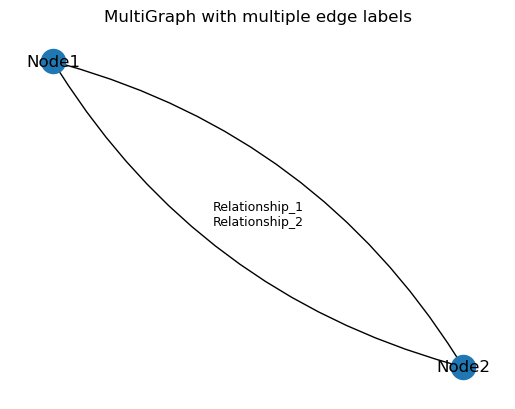

In [12]:
# Create MultiGraph
MG = nx.MultiGraph()
MG.add_edge("Node1", "Node2", label="Relationship_1")
MG.add_edge("Node1", "Node2", label="Relationship_2")

# Layout
pos = nx.spring_layout(MG, seed=42)

# Draw nodes
nx.draw_networkx_nodes(MG, pos)
nx.draw_networkx_labels(MG, pos)

# Draw curved edges
edges = list(MG.edges(keys=True, data=True))
nx.draw_networkx_edges(MG, pos, edgelist=[edges[0][:3]], connectionstyle="arc3,rad=0.2")
nx.draw_networkx_edges(
    MG, pos, edgelist=[edges[1][:3]], connectionstyle="arc3,rad=-0.2"
)

# Manually draw labels near each curved edge
for i, (u, v, k, data) in enumerate(edges):
    # Offset the label slightly from the edge midpoint
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    xm, ym = (x1 + x2) / 2, (y1 + y2) / 2
    offset = 0.05 if i == 0 else -0.05  # offset up/down
    plt.text(xm, ym + offset, data["label"], fontsize=9, ha="center", va="center")

plt.title("MultiGraph with multiple edge labels")
plt.axis("off")
plt.show()

### Observations
- The visualization may show only a single “line” between the two nodes because edges overlap.  
- However, printing out the edge data reveals that there are indeed multiple edges.


## Mini-Quiz 3: Types of Graphs

1. **Directed vs. Undirected**  
   - Give one real-world example of a directed relationship and one example of an undirected relationship.

2. **Weighted Graphs**  
   - Suppose we have a weighted edge representing the distance between two cities. If the weight is 300, what might that value represent?

3. **Bipartite Graph**  
   - In a bipartite graph with sets \( U \) (students) and \( V \) (classes), what does an edge between a student \( u \in U \) and a class \( v \in V \) represent?

4. **Multigraph**  
   - When might it be useful to model multiple edges between the same two nodes?

Write down your answers, then check the solutions below.


# 3. Real-World Applications

Graphs and networks are everywhere! In this section, we'll explore:
- Social Networks  
- Biological Networks  
- Technological Networks

We'll build tiny example networks for each domain, visualize them, and discuss their interpretations.


## 3.1 Social Networks

A **social network** models relationships between individuals or groups.
- **Nodes**: People (or accounts, organizations, groups)  
- **Edges**: Social connections (friendships, follow relationships, collaborations, etc.)

Below is a small, hypothetical “friendship” network among four people: Alice, Bob, Carol, and Dave.


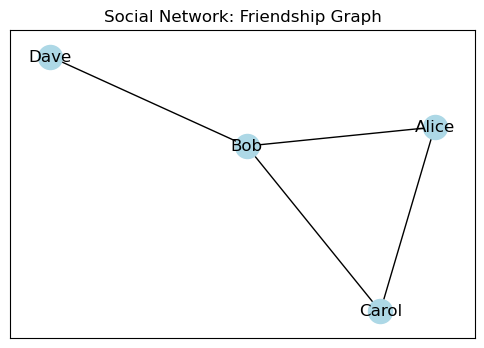

Nodes in social_graph: ['Alice', 'Bob', 'Carol', 'Dave']
Edges in social_graph: [('Alice', 'Bob'), ('Alice', 'Carol'), ('Bob', 'Carol'), ('Bob', 'Dave')]


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a social network graph
social_graph = nx.Graph()
social_graph.add_nodes_from(["Alice", "Bob", "Carol", "Dave"])

# Add edges representing friendships (undirected)
social_graph.add_edges_from(
    [("Alice", "Bob"), ("Alice", "Carol"), ("Bob", "Carol"), ("Bob", "Dave")]
)

# Visualize the social network
pos_social = nx.spring_layout(social_graph, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(social_graph, pos=pos_social, with_labels=True, node_color="lightblue")
plt.title("Social Network: Friendship Graph")
plt.show()

# Print out basic info
print("Nodes in social_graph:", social_graph.nodes())
print("Edges in social_graph:", social_graph.edges())

#### Another Example

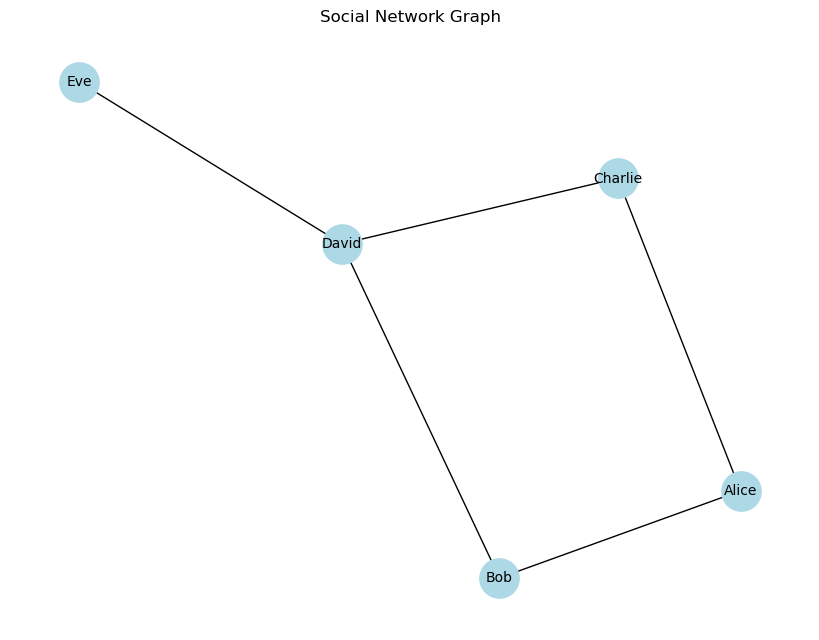

In [14]:
# Example: Social Network Graph
# Create a social network graph
G_social = nx.Graph()
G_social.add_edges_from(
    [
        ("Alice", "Bob"),
        ("Alice", "Charlie"),
        ("Bob", "David"),
        ("Charlie", "David"),
        ("David", "Eve"),
    ]
)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_social, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.title("Social Network Graph")
plt.show()

#### Observations
- **Alice** is connected to both Bob and Carol.  
- **Bob** is connected to all three: Alice, Carol, and Dave.  
- This simple example can model friend relationships, but in reality, social networks can have millions of users.


## 3.2 Biological Networks

A **biological network** can represent many systems in biology or ecology, such as:
- Protein-protein interaction networks  
- Gene regulatory networks  
- Food webs in an ecosystem  

Below is a simplified “food web” where **predator** nodes are connected to **prey** nodes. We’ll treat this as a directed graph because the flow of energy or predation is usually one-way.


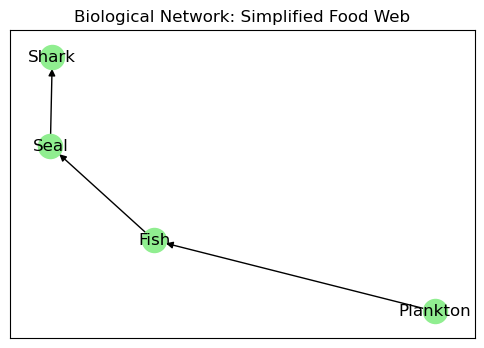

Nodes in bio_graph: ['Plankton', 'Fish', 'Seal', 'Shark']
Edges in bio_graph: [('Plankton', 'Fish'), ('Fish', 'Seal'), ('Seal', 'Shark')]


In [15]:
bio_graph = nx.DiGraph()

# Nodes: species in a small ecosystem
bio_graph.add_nodes_from(["Plankton", "Fish", "Seal", "Shark"])

# Directed edges: who eats whom
# Plankton -> Fish means Fish eat Plankton
bio_graph.add_edges_from([("Plankton", "Fish"), ("Fish", "Seal"), ("Seal", "Shark")])

# Visualize the biological network
pos_bio = nx.spring_layout(bio_graph, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    bio_graph, pos=pos_bio, with_labels=True, node_color="lightgreen", arrows=True
)
plt.title("Biological Network: Simplified Food Web")
plt.show()

# Print out basic info
print("Nodes in bio_graph:", bio_graph.nodes())
print("Edges in bio_graph:", bio_graph.edges())

#### Another Example

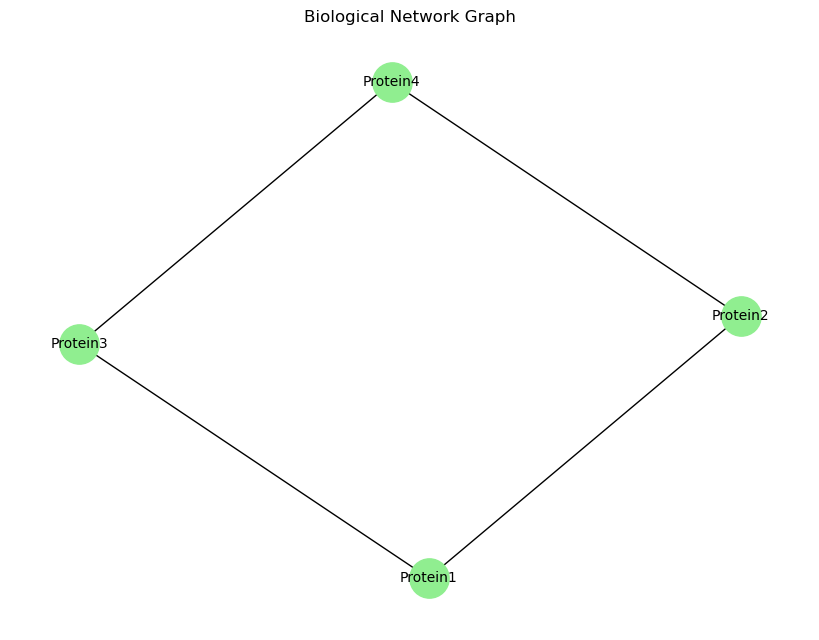

In [16]:
# Example: Biological Network
import networkx as nx
import matplotlib.pyplot as plt

# Create a biological network graph
G_bio = nx.Graph()
G_bio.add_edges_from(
    [
        ("Protein1", "Protein2"),
        ("Protein1", "Protein3"),
        ("Protein2", "Protein4"),
        ("Protein3", "Protein4"),
    ]
)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_bio, with_labels=True, node_color="lightgreen", node_size=800, font_size=10)
plt.title("Biological Network Graph")
plt.show()

## 3.3 Technological Networks

A **technological network** can be something like:
- The structure of the internet (routers and links)  
- Power grids (stations and transmission lines)  
- Transportation networks (airports, roads, etc.)

Below is a small, undirected “computer network” of three routers/switches and two servers.


### Observations
- The direction of edges indicates who **consumes** whom.  
- In a real ecosystem, these networks can be very complex, with multiple predators and prey, and sometimes cyclical relationships.


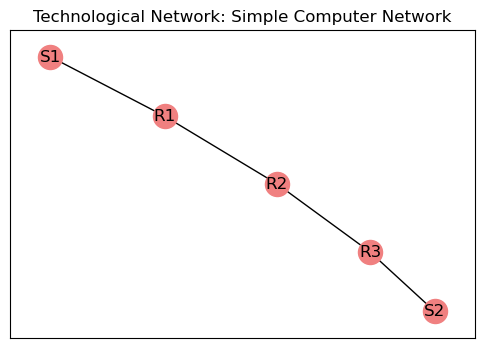

Nodes in tech_graph: ['R1', 'R2', 'R3', 'S1', 'S2']
Edges in tech_graph: [('R1', 'R2'), ('R1', 'S1'), ('R2', 'R3'), ('R3', 'S2')]


In [17]:
tech_graph = nx.Graph()

# Nodes: labeling them as Routers (R1, R2, R3) and Servers (S1, S2)
tech_graph.add_nodes_from(["R1", "R2", "R3", "S1", "S2"])

# Edges representing connections (undirected for simplicity)
tech_graph.add_edges_from(
    [
        ("R1", "R2"),
        ("R2", "R3"),
        ("R1", "S1"),
        ("R3", "S2"),
    ]
)

# Visualize the technological network
pos_tech = nx.spring_layout(tech_graph, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(tech_graph, pos=pos_tech, with_labels=True, node_color="lightcoral")
plt.title("Technological Network: Simple Computer Network")
plt.show()

print("Nodes in tech_graph:", tech_graph.nodes())
print("Edges in tech_graph:", tech_graph.edges())

### Observations
- **R1** and **R2** are connected, and **R2** is also connected to **R3**.
- **R1** connects to **S1**, and **R3** connects to **S2**, so data might pass from S1 to S2 through R1, R2, and R3.


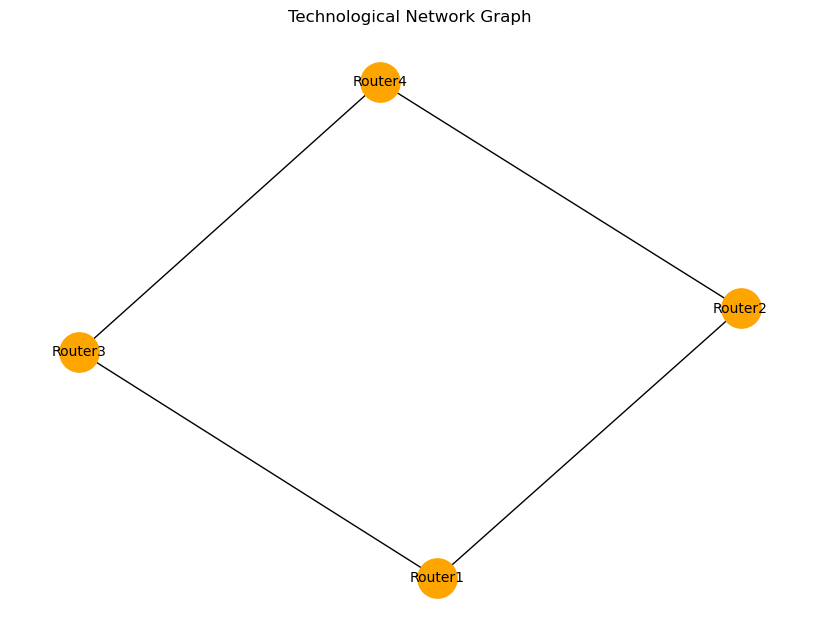

In [18]:
# Example: Communication Network
import networkx as nx
import matplotlib.pyplot as plt

# Create a technological network graph
G_tech = nx.Graph()
G_tech.add_edges_from(
    [
        ("Router1", "Router2"),
        ("Router1", "Router3"),
        ("Router2", "Router4"),
        ("Router3", "Router4"),
    ]
)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_tech, with_labels=True, node_color="orange", node_size=800, font_size=10)
plt.title("Technological Network Graph")
plt.show()

## 3.4 Congress network



Remember the congress network we downloaded in the beginning of the notebook? This file represents the network of congressmen and the committees they serve on. Let's load it and visualize it.

## Case Studies

Real networks are often much larger and more complex.
- **Social**: A full Facebook subgraph could have thousands of users, each user connected to numerous friends.  
- **Biological**: A protein-protein interaction network might contain thousands of proteins with different interaction strengths.  
- **Technological**: An internet map could have millions of routers and links.

For these larger networks, we typically use algorithms to study properties such as:
- **Centrality**: Which nodes are “most important” in the network?  
- **Communities**: Which nodes form tightly-knit clusters?  
- **Connectivity**: Are there weak links that can break the network?


## Discussion / Quiz 4

1. **Social Networks**  
   - Why might we want to identify the “most influential” individual in a social graph?  
   - Give an example of how weighted edges could be used in a social network.

2. **Biological Networks**  
   - Name a potential consequence of removing one “key” species (node) from a food web.  
   - How might directionality be crucial in a gene regulatory network?

3. **Technological Networks**  
   - In a power grid, what might be some risks if a certain node fails or is overloaded?  
   - Which metrics or algorithms could help identify potential bottlenecks in a network?

4. **General**  
   - How do large-scale networks (thousands to millions of nodes) differ in analysis compared to smaller graphs?  
   - What might you do differently in terms of data handling, storage, and computational methods?

Write down your thoughts or answers, then compare with the sample discussion notes below.


---

## **Practice Activity:**

1. Create a graph representing a group of friends in a social network. Visualize it with labels.  
2. Model a simple biological network showing protein interactions and visualize it.  
3. Design a communication network and analyze its connections.  


# 4. Basic Graph Operations

In this section, we will explore how to:
- Add nodes  
- Remove nodes  
- Add edges  
- Remove edges

We’ll use [NetworkX](https://networkx.org/) to create an example graph, perform these operations, and visualize changes after each step.


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# To keep plots inline in Jupyter
%matplotlib inline

# Create a helper function to visualize a given graph


def visualize_graph(G, title="Graph Visualization", node_color="lightblue"):
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G, seed=42)  # consistent layout
    nx.draw_networkx(G, pos=pos, with_labels=True, node_color=node_color)
    plt.title(title)
    plt.show()

## 4.1 Adding Nodes

### 4.1.1 Adding a Single Node
You can add a single node to your graph using the `add_node()` method.


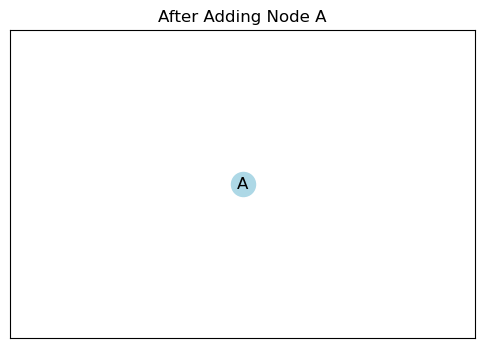

Nodes: ['A']
Edges: []


In [20]:
# Initialize an empty graph
G = nx.Graph()

# Add one node
G.add_node("A")

visualize_graph(G, title="After Adding Node A")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### 4.1.2 Adding Multiple Nodes
Use `add_nodes_from()` to add a list of nodes at once.


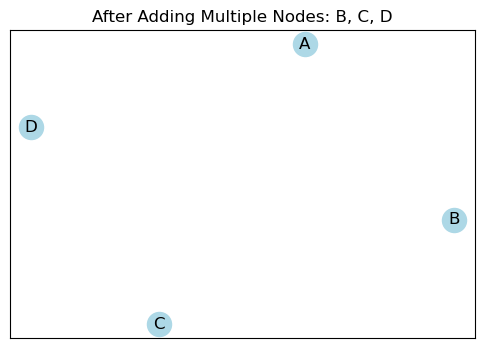

Nodes: ['A', 'B', 'C', 'D']
Edges: []


In [21]:
# Add multiple nodes at once
G.add_nodes_from(["B", "C", "D"])

visualize_graph(G, title="After Adding Multiple Nodes: B, C, D")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

## 4.2 Removing Nodes

### 4.2.1 Removing a Single Node
Use the `remove_node()` method to remove a specific node.


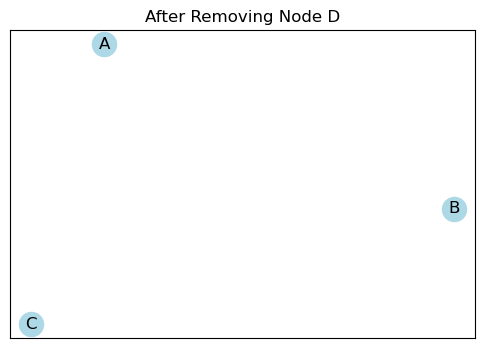

Nodes: ['A', 'B', 'C']
Edges: []


In [22]:
# Remove one node (e.g., "D")
G.remove_node("D")

visualize_graph(G, title="After Removing Node D")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### 4.2.2 Removing Multiple Nodes
Use `remove_nodes_from()` to remove a list of nodes.


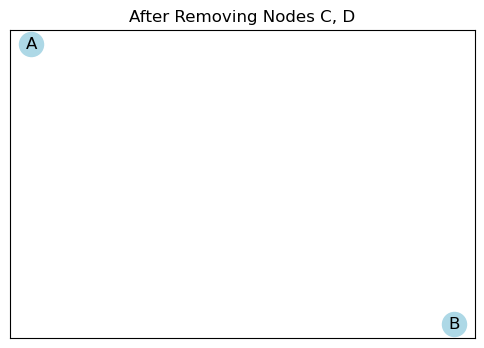

Nodes: ['A', 'B']
Edges: []


In [23]:
# Let's re-add "D" for demonstration purposes
G.add_node("D")

# Now remove multiple nodes at once
G.remove_nodes_from(["C", "D"])

visualize_graph(G, title="After Removing Nodes C, D")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### Observation
If you try removing a node that does not exist, NetworkX will raise an error. You can use `discard_node()` if you want to avoid an error when the node is not present.


## 4.3 Adding Edges

Edges connect two nodes. In an **undirected** graph, an edge `("A", "B")` is the same as `("B", "A")`.


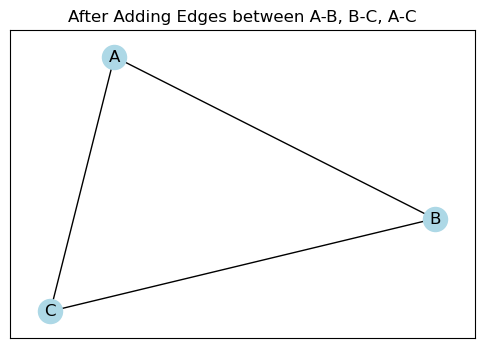

Nodes: ['A', 'B', 'C']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'C')]


In [24]:
# Re-create a fresh graph for clarity
G = nx.Graph()
G.add_nodes_from(["A", "B", "C"])

# Add edges
G.add_edge("A", "B")  # Single edge
G.add_edges_from([("B", "C"), ("A", "C")])  # Multiple edges

visualize_graph(G, title="After Adding Edges between A-B, B-C, A-C")
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

### Observation
Now nodes **A**, **B**, and **C** are fully connected in a triangle.


## 4.4 Removing Edges

You can remove edges in a similar way using `remove_edge(u, v)` or `remove_edges_from()` for multiple edges.


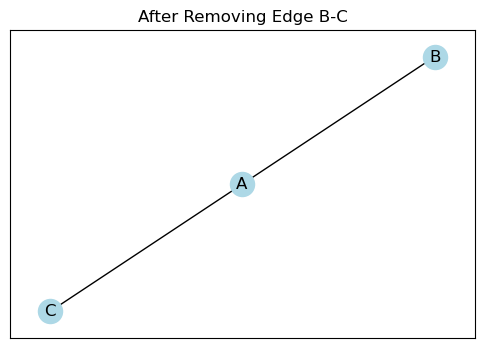

Nodes: ['A', 'B', 'C']
Edges: [('A', 'B'), ('A', 'C')]


In [25]:
# Remove one edge
G.remove_edge("B", "C")

visualize_graph(G, title="After Removing Edge B-C")
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

### Example: Removing Multiple Edges


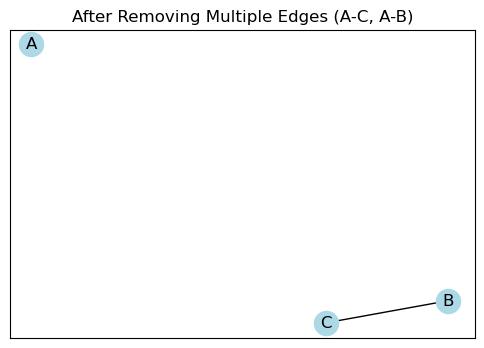

Nodes: ['A', 'B', 'C']
Edges: [('B', 'C')]


In [26]:
# Let's re-add edge B-C for demonstration
G.add_edge("B", "C")

# Remove multiple edges at once
G.remove_edges_from([("A", "C"), ("A", "B")])

visualize_graph(G, title="After Removing Multiple Edges (A-C, A-B)")
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

---

## Traversing Graphs
Traversal algorithms are used to explore graphs. Two common approaches are:  

### **Depth-First Search (DFS)**  
- Explores as far as possible along each branch before backtracking.  

### **Breadth-First Search (BFS)**  
- Explores all neighbors at the current depth before moving deeper.  


In [27]:
# Example: Graph Traversal - DFS and BFS
import networkx as nx

# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Perform DFS
dfs_nodes = list(nx.dfs_preorder_nodes(G, source=0))
print("DFS Traversal Order:", dfs_nodes)

# Perform BFS
bfs_nodes = list(nx.bfs_edges(G, source=0))
print("BFS Traversal Edges:", bfs_nodes)

DFS Traversal Order: [0, 1, 3, 4, 2, 5]
BFS Traversal Edges: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)]


## 4.5 Hands-On Coding Exercises

1. **Add/Remove Nodes**  
   - Create a new graph `H = nx.Graph()`  
   - Add nodes \["X", "Y", "Z"\]  
   - Remove node "Y"  
   - Visualize the graph  

2. **Add/Remove Edges**  
   - Still in graph `H`, add an edge between "X" and "Z"  
   - Remove the edge "X"-"Z"  
   - Visualize the graph  

3. **Error Handling**  
   - What happens if you try to remove a node that doesn’t exist? Try `H.remove_node("W")`.  
   - How can you avoid an error if you’re not sure the node exists?

4. **Combine**  
   - Build a small network of 5 nodes (e.g., 1, 2, 3, 4, 5).  
   - Add edges to connect them in a path (1-2, 2-3, 3-4, 4-5).  
   - Remove the middle node (3).  
   - Check and visualize the final graph structure.


## Mini-Quiz 6 on Graph Operations

1. **Adding a node**  
   - Which NetworkX method allows you to add multiple nodes at once?

2. **Removing a node**  
   - What happens if you remove a node that has edges connected to it?

3. **Adding an edge**  
   - In an undirected graph, how is `add_edge("A", "B")` different from `add_edge("B", "A")`?

4. **Removing edges**  
   - If you remove an edge that doesn’t exist, how does NetworkX handle it?

Try to answer these questions before viewing the answers below.


## Summary

- **Adding Nodes**: `add_node()`, `add_nodes_from()`  
- **Removing Nodes**: `remove_node()`, `remove_nodes_from()`  
- **Adding Edges**: `add_edge(u, v)`, `add_edges_from([...])`  
- **Removing Edges**: `remove_edge(u, v)`, `remove_edges_from([...])`  

These basic operations lay the groundwork for building, modifying, and analyzing more complex networks. Understanding these methods helps you dynamically adjust graphs as needed in real-world data scenarios.


# 6. Conclusion and Next Steps

In this final section, we will:
- Recap the main points covered in this tutorial  
- Demonstrate how to apply the skills learned to a slightly bigger example  
- Provide suggestions and resources for further study


## 6.1 Recap of Key Topics

Throughout this tutorial, we’ve explored:

1. **Definition of Graphs (Nodes and Edges)**  
   - Basic terminology (vertices, edges)  
   - Adjacency structures (lists, matrices, edge lists)

2. **Types of Graphs**  
   - Directed vs. Undirected  
   - Weighted vs. Unweighted  
   - Bipartite and Multigraphs

3. **Real-World Applications**  
   - Social, Biological, and Technological networks

4. **Basic Graph Operations**  
   - Adding/Removing nodes and edges

5. **Python Tools for Graph Creation and Visualization**  
   - NetworkX basics  
   - Visualization with Matplotlib  
   - Simple graph analytics (e.g., degree, connected components, clustering)


## 6.2 Mini Project: Putting It All Together

As a final exercise, let’s combine what we’ve learned into a slightly bigger example.
We’ll:
1. Create a graph with a mix of **directed** edges and **weights**.  
2. Visualize it.  
3. Compute a few metrics.


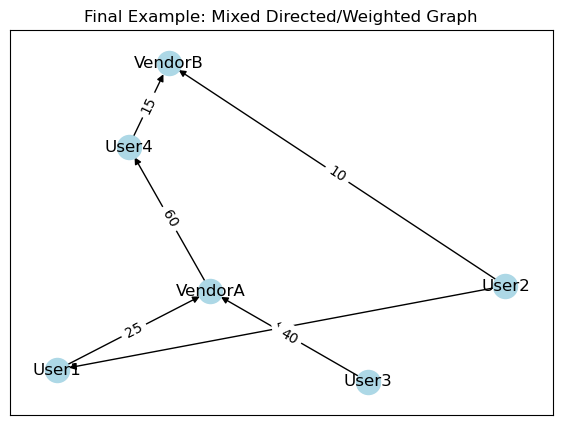

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
final_graph = nx.DiGraph()

# Add nodes
final_graph.add_nodes_from(["User1", "User2", "User3", "User4", "VendorA", "VendorB"])

# Add edges with optional weights (for example, representing transaction amounts)
final_graph.add_edge("User1", "VendorA", weight=25)
final_graph.add_edge("User2", "User1", weight=5)
final_graph.add_edge("User2", "VendorB", weight=10)
final_graph.add_edge("User3", "VendorA", weight=40)
final_graph.add_edge("VendorA", "User4", weight=60)  # Perhaps a refund or data flow
final_graph.add_edge("User4", "VendorB", weight=15)

# Visualize the final graph
pos_final = nx.spring_layout(final_graph, seed=42)
plt.figure(figsize=(7, 5))
nx.draw_networkx(
    final_graph, pos=pos_final, with_labels=True, node_color="lightblue", arrows=True
)

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(final_graph, "weight")
nx.draw_networkx_edge_labels(final_graph, pos_final, edge_labels=edge_labels)

plt.title("Final Example: Mixed Directed/Weighted Graph")
plt.show()

### Observations
- Nodes `User1`, `User2`, `User3`, `User4` represent “users,” while `VendorA`, `VendorB` represent “vendors.”  
- Edges have **direction** (e.g., `User1 -> VendorA`) and **weights** (e.g., `weight=25`).  
- In a real-world scenario, these could represent financial transactions, data flows, or other directed relationships.


## 6.3 Basic Analytics on the Final Graph

Let’s compute a few properties:
- **In-Degree** and **Out-Degree** for each node (since it’s a directed graph)  
- **Strongly Connected Components** (if any)  
- **Shortest Paths** (example: from one user to another or from a user to a vendor)


In [29]:
# In-degree and out-degree
in_degrees = dict(final_graph.in_degree())
out_degrees = dict(final_graph.out_degree())

print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)

# Strongly connected components
scc = list(nx.strongly_connected_components(final_graph))
print("Strongly Connected Components:", scc)

# Example of shortest path (if it exists)
print("Shortest path from User2 to User4 (if any):")
try:
    path_user2_user4 = nx.shortest_path(final_graph, source="User2", target="User4")
    print("Path:", path_user2_user4)
except nx.NetworkXNoPath:
    print("No path found.")

In-Degrees: {'User1': 1, 'User2': 0, 'User3': 0, 'User4': 1, 'VendorA': 2, 'VendorB': 2}
Out-Degrees: {'User1': 1, 'User2': 2, 'User3': 1, 'User4': 1, 'VendorA': 1, 'VendorB': 0}
Strongly Connected Components: [{'VendorB'}, {'User4'}, {'VendorA'}, {'User1'}, {'User2'}, {'User3'}]
Shortest path from User2 to User4 (if any):
Path: ['User2', 'User1', 'VendorA', 'User4']


### Observations
- The in-degree/out-degree breakdown helps us see which nodes are sending or receiving more “flow.”  
- If a strongly connected component contains multiple nodes, those nodes can reach each other in a cycle.  
- Shortest path queries are common for routing, recommendation systems, and more.


# Advanced Graph Algorithms and Applications

## Shortest Path Algorithms
Shortest path algorithms are used to find the minimum distance or cost between nodes in a graph.  
They are widely used in navigation systems, network routing, and social network analysis.

### **Dijkstra's Algorithm**  
Dijkstra’s algorithm finds the shortest path from a source node to all other nodes in a graph with non-negative edge weights.  


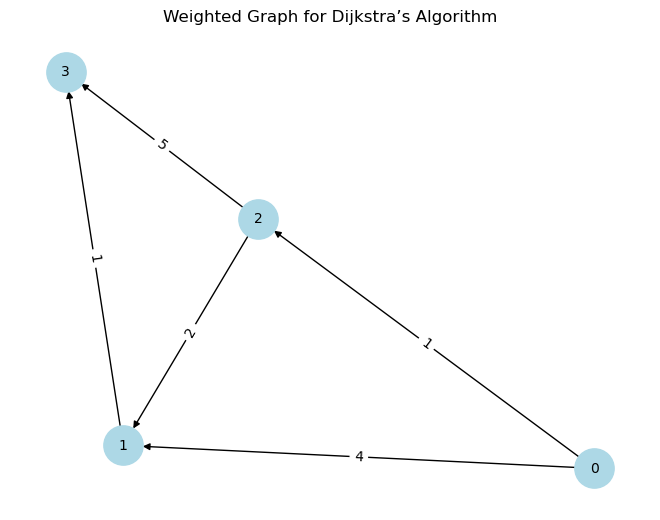

Shortest path: [0, 2, 1, 3]


In [30]:
# Example: Shortest Path using Dijkstra's Algorithm
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted graph
G = nx.DiGraph()
G.add_weighted_edges_from([(0, 1, 4), (0, 2, 1), (1, 3, 1), (2, 1, 2), (2, 3, 5)])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph for Dijkstra’s Algorithm")
plt.show()

# Compute shortest path
shortest_path = nx.dijkstra_path(G, source=0, target=3)
print("Shortest path:", shortest_path)

---

## Minimum Spanning Tree (MST)
A Minimum Spanning Tree is a subset of edges that connects all nodes in a graph without cycles and with the minimum total weight.  
It is commonly used in network design and clustering algorithms.

### **Kruskal's Algorithm**  
Kruskal’s algorithm builds the MST by repeatedly adding the shortest edge that does not form a cycle.  


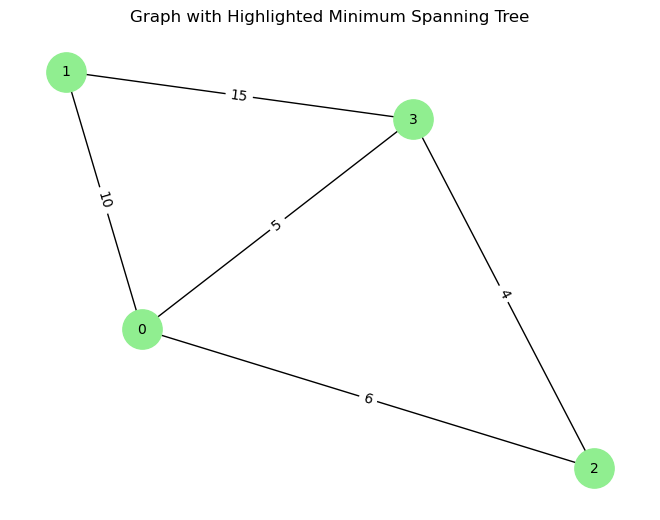

Edges in MST: [(0, 3, {'weight': 5}), (0, 1, {'weight': 10}), (2, 3, {'weight': 4})]


In [31]:
# Example: Minimum Spanning Tree using Kruskal's Algorithm
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted undirected graph
G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)])

# Compute MST
mst = nx.minimum_spanning_tree(G)

# Visualize the MST
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=800, font_size=10)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph with Highlighted Minimum Spanning Tree")
plt.show()

print("Edges in MST:", mst.edges(data=True))

---

## Centrality Measures
Centrality measures identify the most important nodes in a graph.  
They are widely used in social network analysis, biological networks, and transportation systems.

### **Types of Centrality Measures**  
1. **Degree Centrality:** Number of direct connections.  
2. **Closeness Centrality:** Inverse of the sum of distances to all other nodes.  
3. **Betweenness Centrality:** Frequency of a node appearing on shortest paths between others.  


Degree Centrality: {0: 0.3333333333333333, 1: 0.5, 2: 0.3333333333333333, 3: 0.5, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.3333333333333333}
Closeness Centrality: {0: 0.42857142857142855, 1: 0.6, 2: 0.42857142857142855, 3: 0.6666666666666666, 4: 0.5, 5: 0.4, 6: 0.5}
Betweenness Centrality: {0: 0.0, 1: 0.5333333333333333, 2: 0.0, 3: 0.6333333333333333, 4: 0.13333333333333333, 5: 0.03333333333333333, 6: 0.13333333333333333}


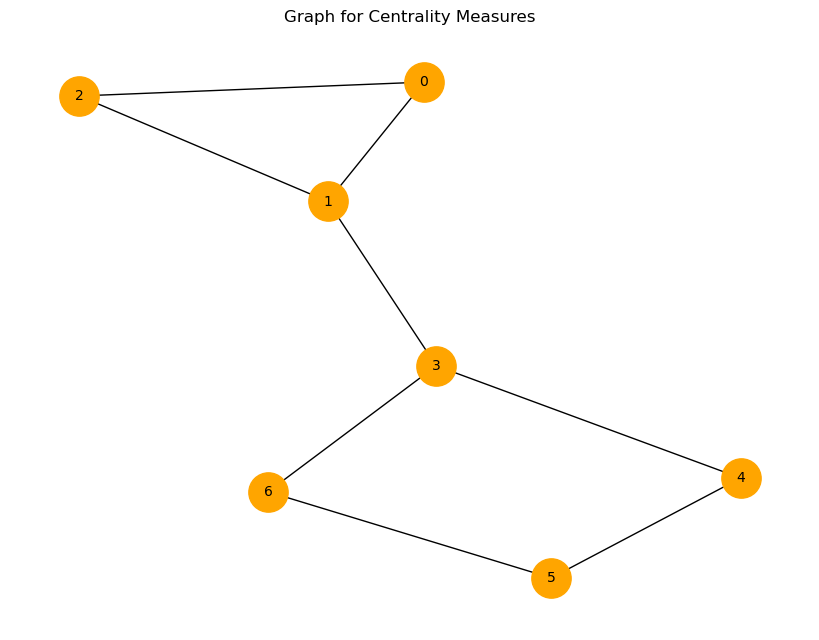

In [32]:
# Example: Centrality Measures
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6), (6, 3)])

# Compute centralities
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="orange", node_size=800, font_size=10)
plt.title("Graph for Centrality Measures")
plt.show()

## 6.4 Discussion and Reflection

1. **Interpreting the Graph**  
   - Which user(s) send the most transactions (highest out-degree)?  
   - Which vendor receives the most transactions (highest in-degree)?

2. **Scaling Up**  
   - What if we have thousands or millions of users?  
   - How might we store and process such a large graph efficiently?

3. **Further Analysis**  
   - Consider computing centrality measures (e.g., betweenness, closeness).  
   - Could we cluster or detect communities in this graph?

4. **Edge Weights**  
   - In this example, weights might represent transaction amounts.  
   - How else could you interpret edge weights (e.g., trust levels, distances, times)?


# Real-Life Example: Twitter Interaction Network for the US Congress

Below is a **structured, interactive tutorial** that uses the **“Twitter Interaction Network for the 117th US Congress”** dataset.

https://snap.stanford.edu/data/congress-twitter.html

This dataset is stored in your Google Drive at:




The folder contains:
- `congress.edgelist` (edge list representation of the network)
- `congress_network_data.json` (additional metadata)
- Python scripts (`viral_centrality.py`, `histogram_weights.py`, etc.)
- `README.txt` (description and instructions)

We’ll focus on reading the **`congress.edgelist`** file into a **NetworkX** graph, performing basic graph operations, and visualizing the network.

## 2. Loading the Congress Network
We'll load the network from **`congress.edgelist`** into a directed graph (DiGraph). Each edge typically represents an interaction on Twitter (retweet, mention, reply, etc.).


In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the edge list (assuming it's a directed network)
G = nx.read_edgelist(
    os.path.join(data_folder, "congress_network", "congress.edgelist"),
    create_using=nx.DiGraph(),
)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Check if G is strongly or weakly connected (if relevant)
print("Is the graph strongly connected?", nx.is_strongly_connected(G))
print("Is the graph weakly connected?", nx.is_weakly_connected(G))

Number of nodes: 475
Number of edges: 13289
Is the graph strongly connected? False
Is the graph weakly connected? True


### Observations

1. **Nodes**: Each node presumably corresponds to a Congress member's Twitter handle (or an ID).  
2. **Edges**: Directed edges show the direction of interaction (e.g., `A -> B` if `A` retweeted/replied/mentioned `B`).  
3. **Connectivity**: This can tell you if there's at least one path (weak connectivity) or if every node is reachable from every other node (strong connectivity) in a directed graph.


## 3. Visualizing a Subset of the Network

Because the network might be large, we can visualize either:
- A **random subgraph** of, say, 50 nodes, or
- A **largest weakly connected component** if the graph is disconnected.

Below is an example of randomly sampling 50 nodes and their edges for a more readable plot.


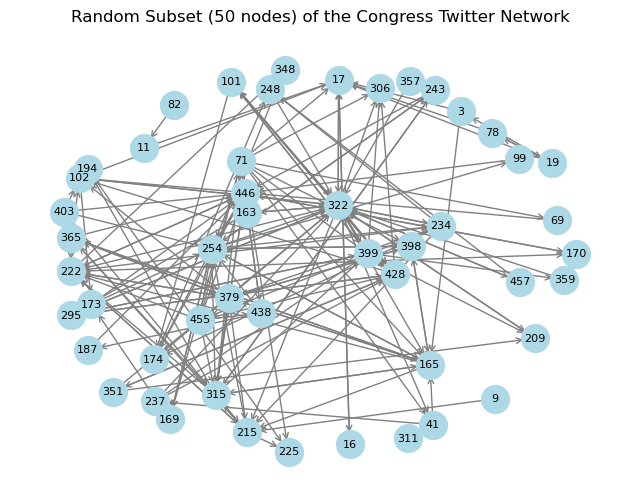

In [34]:
import random

# If the graph is large, let's sample a subset of nodes for visualization
all_nodes = list(G.nodes())
sample_size = 50 if len(all_nodes) > 50 else len(all_nodes)
sub_nodes = random.sample(all_nodes, sample_size)

# Create a subgraph
G_sub = G.subgraph(sub_nodes).copy()

# Visualize the subgraph
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(G_sub, seed=42, k=0.25)  # Layout for better spacing
nx.draw_networkx_nodes(G_sub, pos=pos_sub, node_color="lightblue", node_size=400)
nx.draw_networkx_edges(
    G_sub, pos=pos_sub, arrows=True, arrowstyle="->", arrowsize=10, edge_color="gray"
)
nx.draw_networkx_labels(G_sub, pos=pos_sub, font_size=8)
plt.title("Random Subset (50 nodes) of the Congress Twitter Network")
plt.axis("off")
plt.show()

### Observations

1. **Dense or Sparse**: Some nodes might have many edges (mentions/retweets) while others have few.  
2. **Hubs**: Look for nodes with high in-degree or out-degree.  
3. **Directional Clusters**: In some political networks, members of the same party might primarily interact with each other, forming clusters.


## 4. Basic Graph Operations

In this network, you can:
- **Add a node** (e.g., a newly elected representative).
- **Remove a node** (if you want to filter out certain accounts or inactive members).
- **Add/remove edges** (e.g., update interactions if new data arrives).

### Example: Adding a New Node


In [35]:
G.add_node("New_Congress_Member")

# (Optional) Add an interaction from the new node to an existing one
G.add_edge("New_Congress_Member", random.choice(list(G.nodes())))

print("New node added. Total nodes now:", G.number_of_nodes())

New node added. Total nodes now: 476


### Example: Removing Isolated Nodes



In [36]:
isolated_nodes = list(nx.isolates(G))
print(f"Found {len(isolated_nodes)} isolated nodes (no in/out edges). Removing them...")
G.remove_nodes_from(isolated_nodes)
print("Total nodes after removal:", G.number_of_nodes())

Found 0 isolated nodes (no in/out edges). Removing them...
Total nodes after removal: 476


### Observations

- **Isolated nodes** in a Twitter context might represent accounts that never interacted with anyone (no retweets, replies, or mentions) or had no one interact with them.
- **Adding/Removing** edges and nodes can be essential if you receive updated data or want to filter the network (e.g., keep only nodes with at least 5 interactions).


## 5. Computing Basic Metrics

You can quickly compute fundamental metrics, like:
- **In-degree** and **out-degree**: Who is receiving the most interactions vs. who is sending them?
- **Shortest path**: Possibly relevant if you consider information flow.
- **Connected components**: In a directed graph, you might look at strongly or weakly connected components.


In [37]:
# In-Degree and Out-Degree
in_degrees = {n: G.in_degree(n) for n in G.nodes()}
out_degrees = {n: G.out_degree(n) for n in G.nodes()}

# Identify top 5 nodes by in-degree and out-degree
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by in-degree:", top_in)
print("Top 5 nodes by out-degree:", top_out)

Top 5 nodes by in-degree: [('322', 127), ('208', 121), ('190', 120), ('111', 109), ('254', 108)]
Top 5 nodes by out-degree: [('367', 210), ('322', 157), ('393', 111), ('71', 97), ('399', 89)]


### Observations

- **High in-degree**: These members might be frequently mentioned or retweeted — potential “influencers.”  
- **High out-degree**: These members are very active in mentioning or replying to others.


## 6. (Optional) Handling Edge Weights

The dataset mention suggests "empirical transmission probabilities" from retweets, quotes, replies, or mentions. If `congress.edgelist` or `congress_network_data.json` contains **weights**, you can:
1. Read them as weighted edges.
2. Visualize or histogram them.

### Example: Weighted Edge List
If your `.edgelist` is something like `"source target weight"`, do:

```python
G_weighted = nx.read_weighted_edgelist("congress.edgelist", create_using=nx.DiGraph())


In [38]:
import networkx as nx

G_weighted = nx.DiGraph()

with open(os.path.join(data_folder, "congress_network", "congress.edgelist"), "r") as f:
    for line in f:
        # Suppose each line looks like:
        # node1 node2 {"weight": 0.002105263157894737}
        # We'll parse it manually.

        parts = line.strip().split()
        # parts might look like: ["MemberA", "MemberB", "{'weight':", "0.002105263157894737}"]

        source = parts[0]
        target = parts[1]

        # Reconstruct the weight from the dictionary snippet
        # e.g., "{'weight':" and "0.002105263157894737}"
        # This is hacky, but let's assume the actual float is in the second half:
        w_str = parts[3].replace("}", "")  # remove trailing "}"
        weight = float(w_str)

        G_weighted.add_edge(source, target, weight=weight)

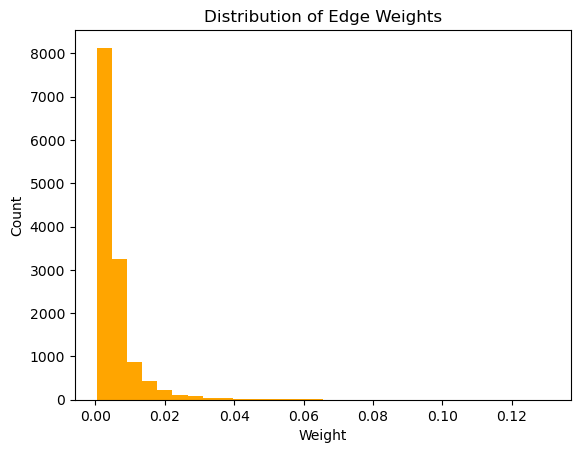

In [39]:
weights = [d["weight"] for (_, _, d) in G_weighted.edges(data=True)]
plt.hist(weights, bins=30, color="orange")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Distribution of Edge Weights")
plt.show()

## 8. Next Steps

- **Community Analysis**: Find whether representatives group by political party or other affiliations.
- **Centrality**: Compute measures like betweenness or PageRank to see who might be most “influential” in retweet/mention chains.
- **Temporal Analysis** (if timestamps are available): Track how interactions evolve over time.


## 6.5 Resources and Next Steps

1. **NetworkX Documentation**  
   - Official docs: [https://networkx.org/documentation](https://networkx.org/documentation)  
   - Explore tutorials on advanced topics like PageRank, maximum flow, bipartite matching, etc.

2. **Interactive Visualization**  
   - Consider tools like **pyvis** or **Plotly** for dynamic graph exploration.

3. **Graph Databases**  
   - Tools like **Neo4j** or **ArangoDB** can handle large-scale graphs with powerful query languages.

4. **Machine Learning on Graphs**  
   - Look into **Graph Neural Networks (GNNs)** using libraries such as **PyTorch Geometric** or **DGL** for advanced analytics.

5. **Reading / Courses**  
   - “Graph Theory” by Reinhard Diestel (textbook)  
   - MOOCs on platforms like Coursera or edX for deeper graph analytics


## Final Mini-Quiz 7

1. **Scaling**  
   - When a graph grows large (100k+ nodes), what considerations become crucial for efficient analysis?

2. **Visualization**  
   - Name two interactive visualization libraries or tools you could use for large graphs.

3. **Advanced Algorithms**  
   - Give an example of a scenario that would benefit from PageRank or centrality analysis.

4. **Further Tools**  
   - What is a graph database, and when might you choose to use one?

(See answers below for a sample discussion.)


## 6.8 Thank You and Wrap-Up

Congratulations! You have:
- Learned the fundamentals of graphs and their representations  
- Explored different graph types and real-world applications  
- Practiced basic graph operations and visualizations using NetworkX  
- Gained insight into how to analyze graphs and interpret key metrics  

We hope this tutorial has provided a solid foundation. Continue experimenting with **real datasets**, **advanced algorithms**, and **interactive visualizations** to deepen your understanding of graph theory and network analysis.


## Quiz 1 Answers and Explanations

1. **Nodes vs. Edges**  
   a. There are **4 nodes**: A, B, C, and D.  
   b. There are **3 edges** if we treat this as an undirected graph: A-B, A-C, and B-D.  
      - Note that A-B and B-A are effectively the **same** edge in an undirected graph.

2. **Graph Terminology**  
   a. Another term for a “node” is **vertex**.  
   b. Another term for an “edge” is **link** or **connection**.


   ## Quiz 3 Answers

1. **Directed vs. Undirected**  
   - **Directed**: “Following” on Twitter (A → B doesn’t imply B → A).  
   - **Undirected**: A friendship network (if A is friends with B, B is automatically friends with A).

2. **Weighted Graphs**  
   - The weight of 300 could represent 300 km or 300 miles of distance between two cities.

3. **Bipartite Graph**  
   - An edge between a student and a class could represent that the student is enrolled in or attending that class.

4. **Multigraph**  
   - You might need parallel edges when modeling multiple “types” of connections (e.g., if you have a road network with multiple parallel highways connecting the same cities or separate relationships between the same two nodes).

Feel free to review your answers and revisit the code or examples if you need more clarity.



## Sample Discussion / Answers 4

1. **Social Networks**  
   - Identifying an “influential” individual can help target marketing campaigns or spread awareness quickly.  
   - Weighted edges might represent the **frequency** of communication or **strength** of relationships (e.g., close friends vs. acquaintances).

2. **Biological Networks**  
   - Removing a key species can collapse the food web or dramatically change predator-prey dynamics.  
   - Directionality in gene regulatory networks matters because a gene A activating gene B does not imply B activates A.

3. **Technological Networks**  
   - In a power grid, failure of a central node can cause **cascading blackouts**, losing entire regions.  
   - Metrics like **betweenness centrality** can identify bottlenecks, and network resilience strategies might involve **redundant paths**.

4. **General**  
   - Large-scale networks require **efficient algorithms** and possibly **distributed computing**.  
   - One must be mindful of **memory usage** and **graph storage formats** (e.g., adjacency lists vs. specialized big data structures).




## Quiz 6 Answers

1. **Adding a node**  
   - You can use `add_nodes_from(["list", "of", "nodes"])` to add multiple nodes.

2. **Removing a node**  
   - Removing a node automatically removes any edges connected to it.

3. **Adding an edge**  
   - In an undirected graph, `("A", "B")` is the same as `("B", "A")`. Both refer to the same edge.

4. **Removing edges**  
   - By default, `remove_edge(u, v)` will raise an error if the edge does not exist. However, if you use `remove_edges_from()`, NetworkX will ignore edges that aren’t present without throwing an error.



## Quiz 7 Answers

1. **Scaling**  
   - Memory usage, choice of data structures (e.g., adjacency lists, specialized graph databases), and parallel/distributed algorithms become key.

2. **Visualization**  
   - **pyvis** and **Plotly** (or **Gephi** as a standalone tool) are options for interactive graph exploration.

3. **Advanced Algorithms**  
   - PageRank or centrality measures can help in ranking web pages (Google’s original algorithm), identifying influencers in social networks, or finding crucial junctions in transportation networks.

4. **Further Tools**  
   - A **graph database** (like Neo4j) stores data in graph form with native graph operations (e.g., pattern matching, shortest path). You’d use it when relationships are complex and you need efficient, specialized queries over large interconnected data.




